In [3]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate


from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 16               # 본문 크기
mpl.rcParams['axes.labelsize'] = 18         # 축 라벨
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['mathtext.fontset'] = 'cm'      # LaTeX 수식은 Computer Modern 유지
mpl.rcParams['axes.linewidth'] = 1.0         # 논문용 선 두께

def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


In [4]:
seed =11
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,10100,dt)
# K = 5.3
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

(0.0, 0.9143655737806696)

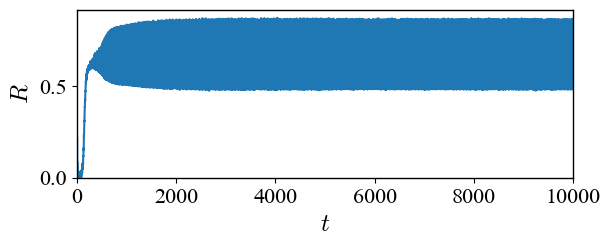

In [7]:
plt.subplot(211)
plt.plot(t,rs)
plt.xlabel(r'$t$',)
plt.ylabel(r'$R$',)
plt.xlim(0,1e4)
plt.ylim(0,)
# plt.title(rf'$K={K},m={m},N={N}$')

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_84997/479575226.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


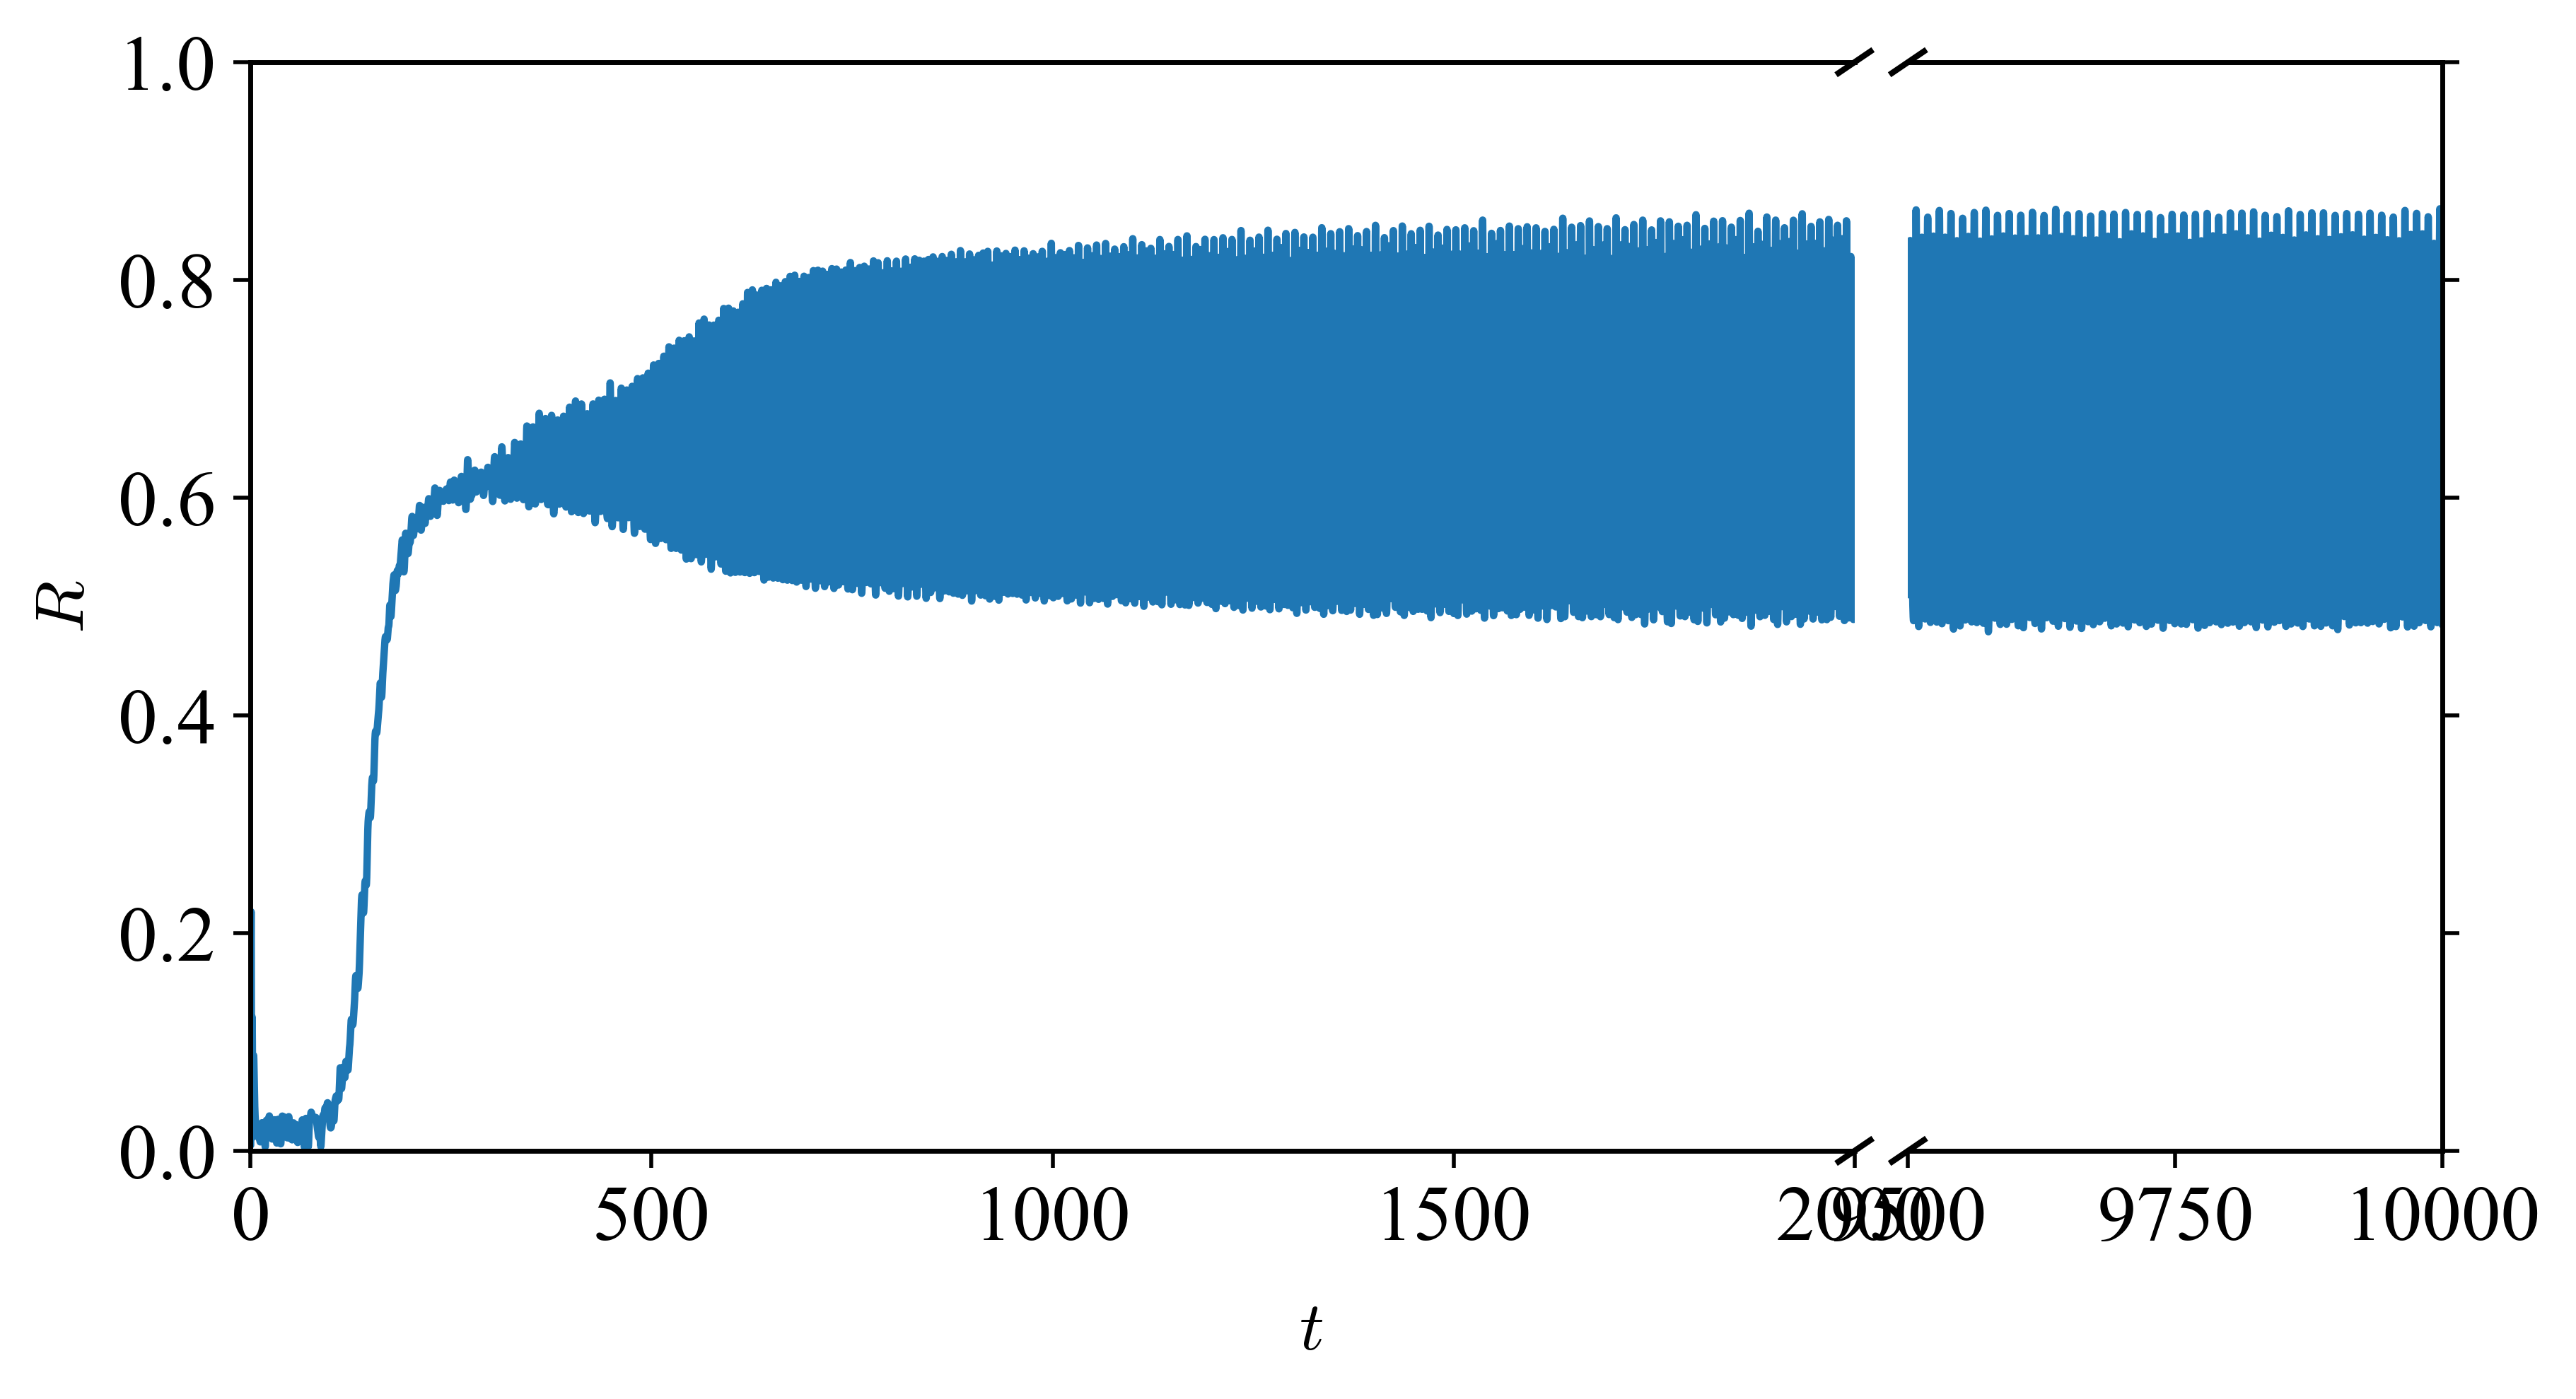

In [14]:
import matplotlib.pyplot as plt

# === 원하는 구간/비율/간격/표식 크기 설정 ===
LEFT_XLIM   = (0, 2000)         # 왼쪽 x 구간
RIGHT_XLIM  = (9500, 10000)     # 오른쪽 x 구간
WIDTH_RATIOS = [3, 1]           # 두 축의 가로폭 비(왼쪽:오른쪽)
WSPACE       = 0.05             # 두 축 사이 간격(작을수록 붙음)
SLASH_SIZE   = 0.010            # // 크기 (축 상대좌표: 0~1)
SLASH_WIDTH  = 1.2              # // 선 굵기
SLASH_COLOR  = 'k'              # // 색
SLASH_ANGLE  = '//'             # 모양을 약간 바꾸고 싶으면 아래 수동 그리기 참고

fig, (ax1, ax2) = plt.subplots(
    1, 2, sharey=True, figsize=(8, 4),
    gridspec_kw={'width_ratios': WIDTH_RATIOS, 'wspace': WSPACE},
    dpi=500
)

# 왼쪽/오른쪽 x범위
ax1.set_xlim(*LEFT_XLIM)
ax2.set_xlim(*RIGHT_XLIM)

# (옵션) 중간 스파인/틱 정리 - 잘린 느낌 강화
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# ---- 여기부터 데이터 그리기 (네가 쓰던 코드 유지) ----
# 예시: 원시/최대/최소 곡선(왼쪽)
ax1.plot(t,rs)
ax2.plot(t,rs)

# --------------------------------------------------
ax1.set_ylim(0,1)
# 잘린 표시(//) 크기/두께/색 조절
d = SLASH_SIZE
kwargs = dict(clip_on=False, color=SLASH_COLOR, linewidth=SLASH_WIDTH)

# 왼쪽 축 끝(오른쪽 테두리)에 //
ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, **kwargs)   # 우하향
ax1.plot((1-d, 1+d), (1-d, 1+d), transform=ax1.transAxes, **kwargs) # 우상향

# 오른쪽 축 시작(왼쪽 테두리)에 //
ax2.plot((-d*3, +d*3), (-d, +d), transform=ax2.transAxes, **kwargs)     # 좌하향
ax2.plot((-d*3, +d*3), (1-d, 1+d), transform=ax2.transAxes, **kwargs)   # 좌상향

# 라벨
ax1.set_ylabel(r"$R$", fontsize=14)
fig.text(0.5, -0.03, r"$t$", ha="center", fontsize=14)
from matplotlib.ticker import EngFormatter

# 지수 표기 (10^3 식) 포맷터 생성


plt.tight_layout()
plt.show()


In [8]:
s_lang = 1000
avg_dtheta = (theta[s_lang:] - theta[0:-s_lang])/(t[s_lang]-t[0])

In [ ]:
import matplotlib.pyplot as plt

# === 원하는 구간/비율/간격/표식 크기 설정 ===
LEFT_XLIM   = (0, 2000)         # 왼쪽 x 구간
RIGHT_XLIM  = (9500, 10000)     # 오른쪽 x 구간
WIDTH_RATIOS = [3, 1]           # 두 축의 가로폭 비(왼쪽:오른쪽)
WSPACE       = 0.05             # 두 축 사이 간격(작을수록 붙음)
SLASH_SIZE   = 0.010            # // 크기 (축 상대좌표: 0~1)
SLASH_WIDTH  = 1.2              # // 선 굵기
SLASH_COLOR  = 'k'              # // 색
SLASH_ANGLE  = '//'             # 모양을 약간 바꾸고 싶으면 아래 수동 그리기 참고

fig, (ax1, ax2) = plt.subplots(
    1, 2, sharey=True, figsize=(8, 4),
    gridspec_kw={'width_ratios': WIDTH_RATIOS, 'wspace': WSPACE},
    dpi=500
)

# 왼쪽/오른쪽 x범위
ax1.set_xlim(*LEFT_XLIM)
ax2.set_xlim(*RIGHT_XLIM)

# (옵션) 중간 스파인/틱 정리 - 잘린 느낌 강화
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# ---- 여기부터 데이터 그리기 (네가 쓰던 코드 유지) ----
# 예시: 원시/최대/최소 곡선(왼쪽)
ax1.errorbar(t[:-s_lang:1000],m_v_0[::1000],yerr=std_v_0[::1000],color='b',lw=1,alpha=0.9,capsize=3,marker='o',fillstyle='none');
ax1.errorbar(t[:-s_lang:1000],m_v_p[::1000],yerr=std_v_p[::1000],color='r',lw=1,alpha=0.9,capsize=3,marker='s',fillstyle='none');
ax1.errorbar(t[:-s_lang:1000],m_v_m[::1000],yerr=std_v_m[::1000],color='g',lw=1,alpha=0.9,capsize=3,marker='^',fillstyle='none');
ax1.plot(t[:-s_lang],max_v_0,color='skyblue',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang],max_v_p,color='lightcoral',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang],max_v_m,color='lightgreen',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang],min_v_0,color='skyblue',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang],min_v_p,color='lightcoral',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang],min_v_m,color='lightgreen',lw=1,alpha=0.9);
ax1.plot(t[:-s_lang:10],avg_dtheta[::10,c_0],c='grey',alpha=0.1,lw=0.2);
ax1.plot(t[:-s_lang:10],avg_dtheta[::10,c_p0],c='grey',alpha=0.1,lw=0.2);
ax1.plot(t[:-s_lang:10],avg_dtheta[::10,c_m0],c='grey',alpha=0.1,lw=0.2);
# ax1.plot(t[:-s_lang:10],avg_dtheta[::10,n_c],c='lightgrey',alpha=0.1,lw=0.2);


# 오른쪽도 동일
ax2.errorbar(t[:-s_lang:1000],m_v_0[::1000],yerr=std_v_0[::1000],color='b',lw=1,alpha=0.9,capsize=3,marker='o',fillstyle='none');
ax2.errorbar(t[:-s_lang:1000],m_v_p[::1000],yerr=std_v_p[::1000],color='r',lw=1,alpha=0.9,capsize=3,marker='s',fillstyle='none');
ax2.errorbar(t[:-s_lang:1000],m_v_m[::1000],yerr=std_v_m[::1000],color='g',lw=1,alpha=0.9,capsize=3,marker='^',fillstyle='none');
ax2.plot(t[:-s_lang],max_v_0,color='skyblue',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang],max_v_p,color='lightcoral',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang],max_v_m,color='lightgreen',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang],min_v_0,color='skyblue',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang],min_v_p,color='lightcoral',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang],min_v_m,color='lightgreen',lw=1,alpha=0.9);
ax2.plot(t[:-s_lang:10],avg_dtheta[::10,c_0],c='grey',alpha=0.1,lw=0.2);
ax2.plot(t[:-s_lang:10],avg_dtheta[::10,c_p0],c='grey',alpha=0.1,lw=0.2);
ax2.plot(t[:-s_lang:10],avg_dtheta[::10,c_m0],c='grey',alpha=0.1,lw=0.2);
# ax2.plot(t[:-s_lang:10],avg_dtheta[::10,n_c],c='lightgrey',alpha=0.1,lw=0.2);
# --------------------------------------------------

# 잘린 표시(//) 크기/두께/색 조절
d = SLASH_SIZE
kwargs = dict(clip_on=False, color=SLASH_COLOR, linewidth=SLASH_WIDTH)

# 왼쪽 축 끝(오른쪽 테두리)에 //
ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, **kwargs)   # 우하향
ax1.plot((1-d, 1+d), (1-d, 1+d), transform=ax1.transAxes, **kwargs) # 우상향

# 오른쪽 축 시작(왼쪽 테두리)에 //
ax2.plot((-d*3, +d*3), (-d, +d), transform=ax2.transAxes, **kwargs)     # 좌하향
ax2.plot((-d*3, +d*3), (1-d, 1+d), transform=ax2.transAxes, **kwargs)   # 좌상향

# 라벨
ax1.set_ylabel(r"$\langle v_i \rangle$", fontsize=14)
fig.text(0.5, -0.03, r"$t$", ha="center", fontsize=14)

